# Question 1            Sena İrem Toka 090190361

In [268]:
import pandas as pd
import folium 
from folium.plugins import HeatMap, HeatMapWithTime
import numpy as np
from datetime import datetime, timedelta


In this question first I looked at the class lectures to see how we imported the data from the İBB database. The question asks to import the data by choosing the year and the month. When I looked at the URL of the data I saw that the month and the year is specified in the link. So with a function we can change the link according to the month and year we want the data from. 

With this function the url changes the month and year according to what the function is called with

In [269]:
import pandas as pd

def load_traffic_data(year, month):

    base_url = 'https://data.ibb.gov.tr/dataset/3ee6d744-5da2-40c8-9cd6-0e3e41f1928f/resource/7b9a35a7-dc9c-4044-b117-1c0003104630/download/traffic_density_'
    file_extension = '.csv'
    
    year_month_str = f'{year}{month:02d}'

    url = f'{base_url}{year_month_str}{file_extension}'
    
    try:
        traffic_data = pd.read_csv(url)
    except Exception as e:
        print(f"Error loading data for {year}-{month:02d}: {str(e)}")
        return None

    return traffic_data

I loaded the September 2023 data by calling the function

In [270]:
traffic_data = load_traffic_data(2023, 9)

traffic_data

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
0,2023-09-01 00:00:00,29.317017,40.921326,sxkbg1,8,121,65,95
1,2023-09-01 00:00:00,29.163208,40.915833,sxk8z8,4,84,29,18
2,2023-09-01 00:00:00,29.130249,41.130066,sxk9yz,48,118,70,15
3,2023-09-01 00:00:00,29.086304,41.009216,sxk9mc,4,157,56,158
4,2023-09-01 00:00:00,28.811646,40.992737,sxk3pw,13,111,67,110
...,...,...,...,...,...,...,...,...
1640764,2023-09-30 23:00:00,29.020386,41.206970,sxkdkm,32,50,40,5
1640765,2023-09-30 23:00:00,28.855591,41.042175,sxk92x,2,39,18,44
1640766,2023-09-30 23:00:00,29.317017,40.992737,sxkc5n,61,153,92,28
1640767,2023-09-30 23:00:00,29.020386,40.998230,sxk9hr,7,50,22,14


I check the column names to do the groupby action 

In [271]:
traffic_data.columns

Index(['DATE_TIME', 'LONGITUDE', 'LATITUDE', 'GEOHASH', 'MINIMUM_SPEED',
       'MAXIMUM_SPEED', 'AVERAGE_SPEED', 'NUMBER_OF_VEHICLES'],
      dtype='object')

Grouping the data by GEOHASH column, and then aggragating the given columns by the instructions in the question.
I reset the index so that GEOHASH becomes a regular column that i can operate on.

In [272]:

agg_traffic_data = traffic_data.groupby('GEOHASH').agg({
    'LONGITUDE': 'first',
    'LATITUDE': 'first',
    'AVERAGE_SPEED': 'mean',
    'NUMBER_OF_VEHICLES': 'mean'
}).reset_index()  

print(agg_traffic_data)


     GEOHASH  LONGITUDE   LATITUDE  AVERAGE_SPEED  NUMBER_OF_VEHICLES
0     sx7chk  27.965698  40.981750      84.105187           12.887608
1     sx7chm  27.965698  40.987244      70.066092           24.155172
2     sx7cht  27.976685  40.987244      36.829023           21.455460
3     sx7chw  27.976685  40.992737      67.688218           27.090517
4     sx7chx  27.976685  40.998230      70.951149           27.387931
...      ...        ...        ...            ...                 ...
2451  sxm41s  29.602661  41.157532      71.744409            6.143770
2452  sxm41u  29.613647  41.157532      58.456486            5.213465
2453  sxm445  29.624634  41.152039      73.248214            4.132143
2454  sxm44h  29.624634  41.157532      69.869410            4.334526
2455  sxm44k  29.635620  41.157532      54.235602            5.041885

[2456 rows x 5 columns]


 with the .nlargest method I find the highest 25 average values of the asked columns and print them 

In [273]:
highest_avg_vehicles = agg_traffic_data.nlargest(25, 'NUMBER_OF_VEHICLES')

highest_avg_speed = agg_traffic_data.nlargest(25, 'AVERAGE_SPEED')

lowest_avg_speed = agg_traffic_data.nsmallest(25, 'AVERAGE_SPEED')

print("Top 25 data points with the highest average number of vehicles:")
print(highest_avg_vehicles)

print("\nTop 25 data points with the highest average speed:")
print(highest_avg_speed)

print("\nTop 25 data points with the lowest average speed:")
print(lowest_avg_speed)

Top 25 data points with the highest average number of vehicles:
     GEOHASH  LONGITUDE   LATITUDE  AVERAGE_SPEED  NUMBER_OF_VEHICLES
591   sxk3xe  28.811646  41.064148      49.714491          432.842181
1521  sxk9pq  29.152222  40.992737      40.444763          423.500717
1902  sxkbgk  29.328003  40.937805      63.734577          411.017217
590   sxk3xd  28.811646  41.058655      49.022956          406.098996
1755  sxkb6p  29.273071  40.866394      45.856528          396.345768
1897  sxkbge  29.338989  40.932312      67.466284          392.691535
1171  sxk985  28.833618  41.064148      53.645624          392.296987
1500  sxk9nx  29.119263  40.998230      58.395983          384.121951
410   sxk3k8  28.679810  41.003723      48.308465          377.347202
463   sxk3py  28.822632  40.992737      53.578192          374.870875
508   sxk3rs  28.811646  41.025696      41.977044          367.187948
586   sxk3x8  28.811646  41.047668      43.271162          348.781923
585   sxk3x7  28.800659  4

to create a map with folium i looked at these sites:

https://www.kaggle.com/code/daveianhickey/how-to-folium-for-maps-heatmaps-time-data

https://towardsdatascience.com/creating-geospatial-heatmaps-with-pythons-plotly-and-folium-libraries-4159e98a1ae8#:~:text=Heatmaps%20provide%20a%20great%20way,log%20properties%20across%20large%20regions 

I chose a random location from my data to just get a first overview of the Istanbul map like below

In [274]:
folium.Map(location=[41.003723, 28.998413])

I looked at the links above and I searched for how could I adapt it to the data that I have. I adapted one of the examples by trial and error to create my heatmap.

In [275]:
hm = folium.Map(location=[41.003723, 28.998413], zoom_start=9)

heat_data = [[row['LATITUDE'], row['LONGITUDE'], row['NUMBER_OF_VEHICLES']] for index, row in agg_traffic_data.iterrows()]

HeatMap(heat_data, min_opacity=0.4, blur=18).add_to(folium.FeatureGroup(name='Heat Map').add_to(hm))

folium.LayerControl().add_to(hm)

hm

# Question 2

This question took so much time and to clean the data sets I had to do lots and lots of trial and error. I could not import the data in python as xlsx so I used it as xls I hope it's not a problem.



Firstly i import the level0 data from the excel file that i downloaded.


In [276]:
import pandas as pd

file_path_level0 = '/Users/senairemtoka/Downloads/HW2-Population-level0.xls'
df_level0 = pd.read_excel(file_path_level0, engine='xlrd')

df_level0

,TÜRKİYE İSTATİSTİK KURUMU,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000 GENEL NÜFUS SAYIMI VERİ TABANI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
89,Osmaniye,458782,231259,227523,311994,159335,152659,146788,71924,74864
90,Düzce,314266,161927,152339,130632,67656,62976,183634,94271,89363
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,Şehir : İl ve ilçe merkezleri sınırları içinde...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I tried so many things to make the level0 data as I wanted but the end product that I want requires what the function below does:
I drop the NaN values and I reset the indices otherwise it gets complicated.
After dropping the NaN values I know that I do not want the first 3 and last 3 rows so I drop those rows.
I fill the NaN values as blank ' ' and drop the 0 values.
and it gives me the way that i want the level_0 and level_1 data. 

I modified this function by trying on both datasets so that it works for both.

In [277]:

def clean_dataframe(df):
    df_cleaned = df.dropna(axis=0, how='all').dropna(axis=1, how='all')

    df_cleaned = df_cleaned.reset_index(drop=True)

    df_cleaned = df_cleaned.iloc[2:-3, :]

    df_cleaned.columns = df_cleaned.iloc[0]
    df_cleaned.columns = df_cleaned.columns.fillna('')
    df_cleaned = df_cleaned.fillna('')
    df_cleaned = df_cleaned.reset_index(drop=True)

    df_cleaned = df_cleaned.drop(0)

    return df_cleaned



In [278]:
df_cleaned_level0 = clean_dataframe(df_level0)

df_cleaned_level0

2,İller,Toplam,,,Şehir,,,Köy,,
1,,Toplam,Erkek,Kadın,Toplam,Erkek,Kadın,Toplam,Erkek,Kadın
2,Türkiye,67803927,34346735,33457192,44006184,22427541,21578643,23797743,11919194,11878549
3,Adana,1849478,920001,929477,1397853,693586,704267,451625,226415,225210
4,Adıyaman,623811,313362,310449,338939,173772,165167,284872,139590,145282
5,Afyon,812416,409311,403105,371868,189637,182231,440548,219674,220874
...,...,...,...,...,...,...,...,...,...,...
78,Iğdır,168634,87083,81551,81582,43190,38392,87052,43893,43159
79,Yalova,168593,88750,79843,98661,49922,48739,69932,38828,31104
80,Karabük,225102,111340,113762,157756,79010,78746,67346,32330,35016
81,Kilis,114724,57081,57643,74985,37558,37427,39739,19523,20216


I import the level 1 data that i downloaded. 

In [279]:
file_path_level1 = '/Users/senairemtoka/Downloads/HW2-Population-level1.xls'
df_level1 = pd.read_excel(file_path_level1, engine='xlrd')

df_level1

,TÜRKİYE İSTATİSTİK KURUMU,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000 GENEL NÜFUS SAYIMI VERİ TABANI,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
949,NaN,NaN,Çilimli,NaN,7147,3717,3430
950,NaN,NaN,Gölyaka,NaN,8572,4388,4184
951,NaN,NaN,Gümüşova,NaN,12103,6101,6002
952,NaN,NaN,Kaynaşlı,NaN,9439,5270,4169


I use the function I wrote to get rid of the parts of the data that I want.

In [280]:
df_cleaned_level1 = clean_dataframe(df_level1)

df_cleaned_level1

2,,İl,İlçe,Alt kademe,Toplam,Erkek,Kadın
1,,Adana,Seyhan,,807934,396728,411206
2,,,Yüreğir,,322776,161362,161414
3,,,Aladağ,,6674,3299,3375
4,,,Ceyhan,,108602,54875,53727
5,,,Feke,,4632,2393,2239
...,...,...,...,...,...,...,...
939,,Düzce,Merkez,,56649,28992,27657
940,,,Akçakoca,,25560,13576,11984
941,,,Cumayeri,,7434,3726,3708
942,,,Çilimli,,7147,3717,3430


I took the GADM data as json and I used the geopandas read method. 

While I was trying to merge the shape data and level 1 data I realized there are some values missing because of Turkish characters so I asked Chatgpt how I could fix it.

It suggested that I used the .apply(unidecode) and make every word i am trying to merge by lowercase.

I merged these datasets by the 'İlçe' names which are on the NAME_2 column in the shape data.

---There is a problem I could not fix no matter how hard I tried which is when the NAME_2 and İlçe is 'merkez' it matched with other random 'merkez' values. I tried to write a function which has a condition that checks the 'NAME_1'=='İL' so that merkez values would match with the right ones. But I could not manage to make a condition like this work.

In [281]:
import geopandas as gpd
from unidecode import unidecode

geojson_path = 'https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_TUR_2.json.zip'  
gdf_geojson = gpd.read_file(geojson_path)

gdf_geojson['NAME_2'] = gdf_geojson['NAME_2'].apply(unidecode).str.lower()
df_cleaned_level1['İlçe'] = df_cleaned_level1['İlçe'].apply(unidecode).str.lower()

merged_gdf = gdf_geojson.merge(df_cleaned_level1, how='left', left_on='NAME_2', right_on='İlçe')


merged_gdf

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,...,CC_2,HASC_2,geometry,,İl,İlçe,Alt kademe,Toplam,Erkek,Kadın
0,TUR.1.1_1,TUR,Turkey,TUR.1_1,Adana,NA,aladag,NA,NA,District,...,NA,TR.AA.AL,"MULTIPOLYGON (((35.58970 37.94590, 35.56940 37...",,,aladag,,6674,3299,3375
1,TUR.1.2_1,TUR,Turkey,TUR.1_1,Adana,NA,ceyhan,NA,NA,District,...,NA,TR.AA.CE,"MULTIPOLYGON (((35.93400 36.87990, 35.92240 36...",,,ceyhan,,108602,54875,53727
2,TUR.1.3_1,TUR,Turkey,TUR.1_1,Adana,NA,feke,NA,NA,District,...,NA,TR.AA.FE,"MULTIPOLYGON (((35.64170 37.70990, 35.62810 37...",,,feke,,4632,2393,2239
3,TUR.1.4_1,TUR,Turkey,TUR.1_1,Adana,NA,imamoglu,NA,NA,District,...,NA,TR.AA.IM,"MULTIPOLYGON (((35.43950 37.30670, 35.45380 37...",,,imamoglu,,30428,15572,14856
4,TUR.1.5_1,TUR,Turkey,TUR.1_1,Adana,NA,karaisali,NA,NA,District,...,NA,TR.AA.KS,"MULTIPOLYGON (((35.09230 37.49990, 35.12020 37...",,,karaisali,,6883,3500,3383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6226,TUR.81.6_1,TUR,Turkey,TUR.81_1,Zinguldak,NA,merkez,Zonguldak,NA,District,...,NA,TR.ZO.ZO,"MULTIPOLYGON (((31.97670 41.54430, 31.99290 41...",,Yalova,merkez,,70118,35244,34874
6227,TUR.81.6_1,TUR,Turkey,TUR.81_1,Zinguldak,NA,merkez,Zonguldak,NA,District,...,NA,TR.ZO.ZO,"MULTIPOLYGON (((31.97670 41.54430, 31.99290 41...",,Karabük,merkez,,100749,51017,49732
6228,TUR.81.6_1,TUR,Turkey,TUR.81_1,Zinguldak,NA,merkez,Zonguldak,NA,District,...,NA,TR.ZO.ZO,"MULTIPOLYGON (((31.97670 41.54430, 31.99290 41...",,Kilis,merkez,,70670,35246,35424
6229,TUR.81.6_1,TUR,Turkey,TUR.81_1,Zinguldak,NA,merkez,Zonguldak,NA,District,...,NA,TR.ZO.ZO,"MULTIPOLYGON (((31.97670 41.54430, 31.99290 41...",,Osmaniye,merkez,,173977,87760,86217


I created a choropleth map with geopandas plot.
I made the scale from the minimum of the population that the data has to the maximum.

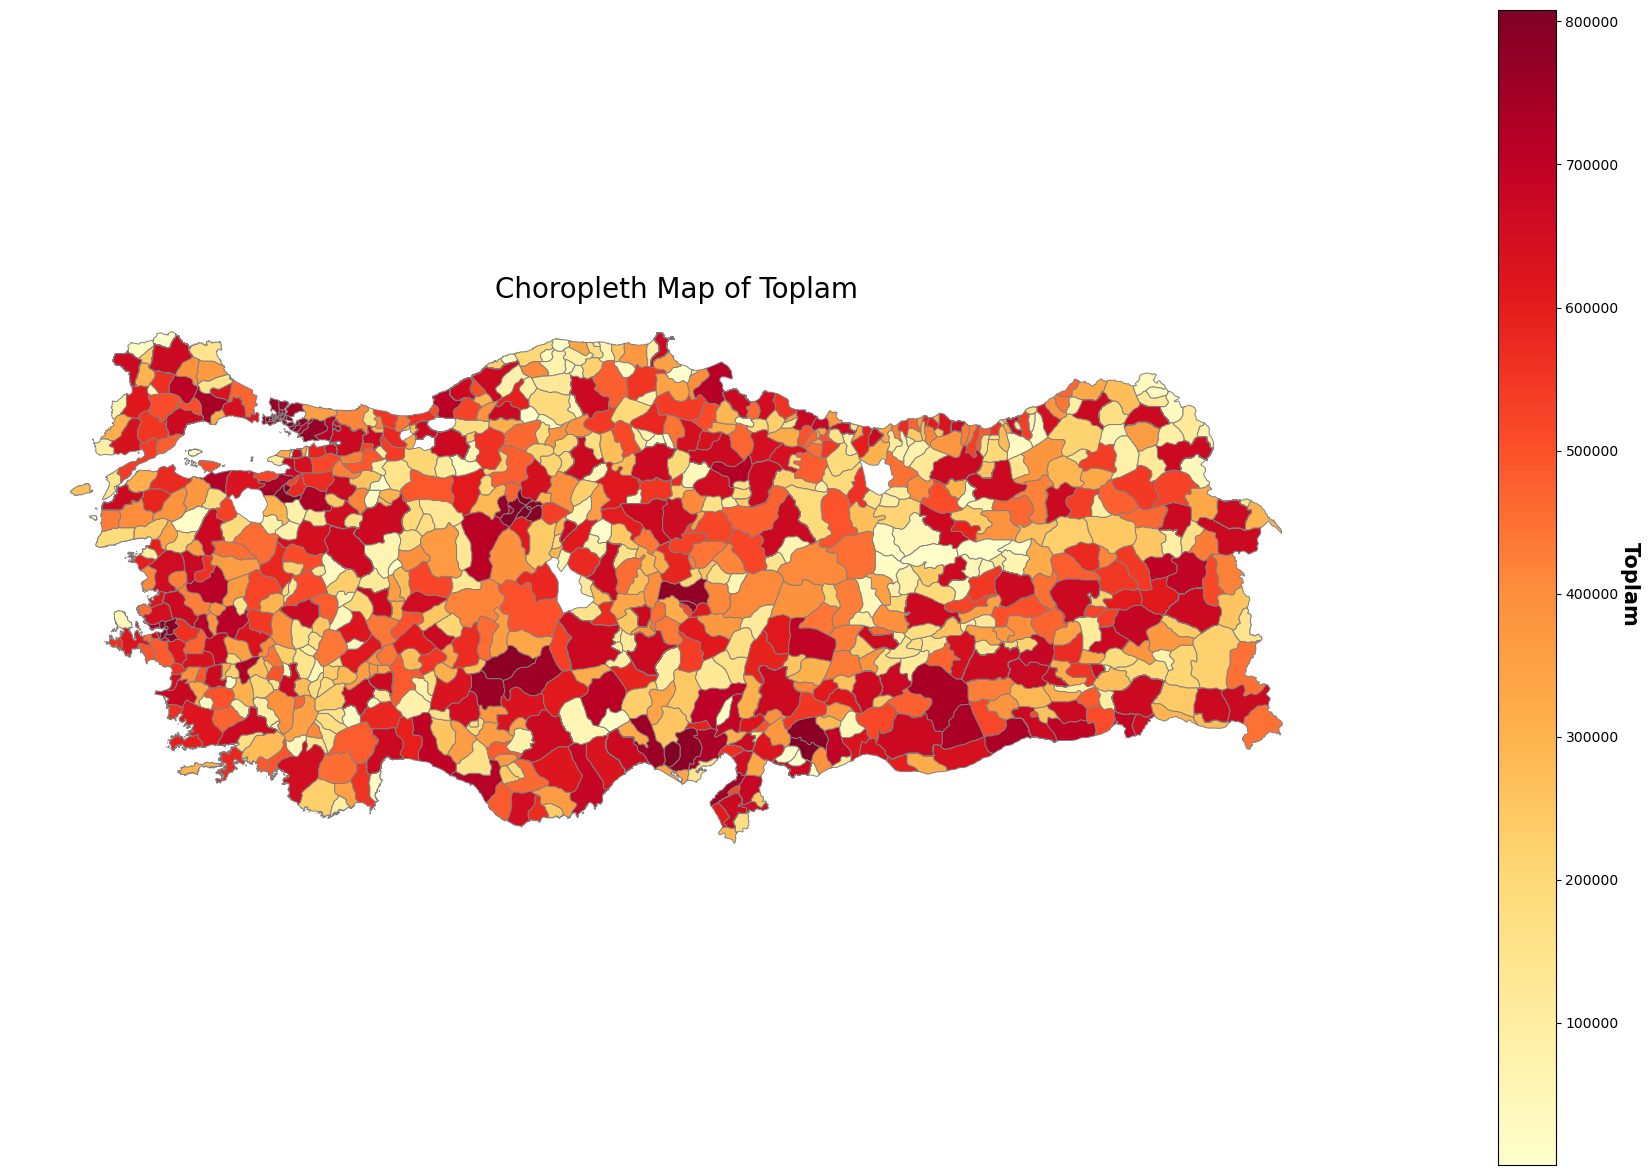

In [282]:
import geopandas as gpd
import pandas as pd
from unidecode import unidecode
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(20, 15))

column_to_visualize = 'Toplam'

merged_gdf.plot(column=column_to_visualize, cmap='YlOrRd', linewidth=0.7, ax=ax, edgecolor='0.5', legend=False)
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=Normalize(vmin=merged_gdf[column_to_visualize].min(), vmax=merged_gdf[column_to_visualize].max()))

cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.04, pad=0.1)
cbar.set_label(f'{column_to_visualize} ', rotation=270, labelpad=15, size=15, weight='bold')

ax.set_title(f'Choropleth Map of {column_to_visualize}', fontdict={'fontsize': '20', 'fontweight': '6'})
ax.set_axis_off()
plt.show()


For me the actual hard part was cleaning the crime data.

I downloaded the crime data for 2000  because I have the 2000's population.

In [283]:
file_path_crime = '/Users/senairemtoka/Downloads/HW2-Crime.xls'
df_crime = pd.read_excel(file_path_crime, engine='xlrd')

# Display the DataFrame
df_crime

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Sütunlar,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84
0,Satırlar,NaN,NaN,Adana-1,Adıyaman-2,Afyonkarahisar-3,Aksaray-68,Amasya-5,Ankara-6,Antalya-7,...,Yalova-77,Yozgat-66,Zonguldak-67,Çanakkale-17,Çankırı-18,Çorum-19,İstanbul-34,İzmir-35,Şanlıurfa-63,Şırnak-73
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Suç Işlenen Ile Göre Ceza Infaz Kurumuna Giren...,Suç türü:26. (Dolandırıcılık),2000.0,187,15,47,12,8,854,306,...,9,13,30,39,5,49,1887,578,20,1
4,NaN,Suç türü:36. (Orman Suçları),2000.0,61,9,17,NaN,15,3,38,...,1,16,16,21,4,14,18,21,NaN,NaN
5,NaN,Suç türü:38. (İcra İflas Kanununa Muhalefet),2000.0,581,166,1258,138,509,5192,2566,...,77,601,601,1260,190,742,5172,3346,347,21
6,NaN,Suç türü:42. (Zina),2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,"Suç türü:43. (Dövmek, Yaralamak)",2000.0,134,12,63,47,6,255,141,...,17,28,51,31,4,19,611,190,42,8
8,NaN,"Suç türü:44. (Rüşvet, İrtikap Ve Sahtecilik)",2000.0,77,1,17,8,3,133,65,...,13,9,7,17,1,15,370,77,16,16
9,NaN,Suç türü:45. (Ateşli Silahlar),2000.0,92,8,23,6,2,105,71,...,7,5,15,10,1,12,508,83,67,16


This dataset was more complex than the level 0 and level 1. So I had to everything step by step and checking if I did it right.

For the NaN values I filled them as ' ' blank. 

I modified the 'Suç türü' values by dropping the Suç türü and number that it had afterwards for every row. 


In [284]:
df_crime = df_crime.fillna('')
df_crime.iloc[:, 1] = df_crime.iloc[:, 1].astype(str).str.split('.').str[1].str.strip()

df_crime

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Sütunlar,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84
0,Satırlar,NaN,,Adana-1,Adıyaman-2,Afyonkarahisar-3,Aksaray-68,Amasya-5,Ankara-6,Antalya-7,...,Yalova-77,Yozgat-66,Zonguldak-67,Çanakkale-17,Çankırı-18,Çorum-19,İstanbul-34,İzmir-35,Şanlıurfa-63,Şırnak-73
1,,NaN,,,,,,,,,...,,,,,,,,,,
2,,NaN,,,,,,,,,...,,,,,,,,,,
3,Suç Işlenen Ile Göre Ceza Infaz Kurumuna Giren...,(Dolandırıcılık),2000.0,187,15,47,12,8,854,306,...,9,13,30,39,5,49,1887,578,20,1
4,,(Orman Suçları),2000.0,61,9,17,,15,3,38,...,1,16,16,21,4,14,18,21,,
5,,(İcra İflas Kanununa Muhalefet),2000.0,581,166,1258,138,509,5192,2566,...,77,601,601,1260,190,742,5172,3346,347,21
6,,(Zina),2000.0,,,,,,,,...,,,,,,,,,,
7,,"(Dövmek, Yaralamak)",2000.0,134,12,63,47,6,255,141,...,17,28,51,31,4,19,611,190,42,8
8,,"(Rüşvet, İrtikap Ve Sahtecilik)",2000.0,77,1,17,8,3,133,65,...,13,9,7,17,1,15,370,77,16,16
9,,(Ateşli Silahlar),2000.0,92,8,23,6,2,105,71,...,7,5,15,10,1,12,508,83,67,16


I transposed the dataset because the level data was also formatted like this.



In [285]:
df_crime= df_crime.T
df_crime = df_crime.iloc[1:, :].reset_index(drop=True)

# Display the modified DataFrame
df_crime

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,NaN,NaN,NaN,(Dolandırıcılık),(Orman Suçları),(İcra İflas Kanununa Muhalefet),(Zina),"(Dövmek, Yaralamak)","(Rüşvet, İrtikap Ve Sahtecilik)",(Ateşli Silahlar),...,"(Kız, Kadın Ve Erkek Kaçırmak)",(Kabahatler),(Trafik Kanunu'Na Muhalefet),(Irza Geçmek Ve Sarkıntılık),(Cebri Hırsızlık),"(Sövme, Hakaret)",(Para Ve Mal Kaçakçılığı Yapmak),"(Uyuşturucu Madde Kullanmak, Satmak, Satın Almak)",(Hırsızlık),(Diğer)
1,,,,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,...,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
2,Adana-1,,,187,61,581,,134,77,92,...,17,15,20,42,36,2,8,101,177,338
3,Adıyaman-2,,,15,9,166,,12,1,8,...,1,5,15,3,5,,6,12,24,13
4,Afyonkarahisar-3,,,47,17,1258,,63,17,23,...,12,21,27,23,5,4,5,8,37,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Çorum-19,,,49,14,742,,19,15,12,...,4,6,31,11,6,1,3,2,23,25
80,İstanbul-34,,,1887,18,5172,,611,370,508,...,57,39,92,152,324,9,44,921,1384,857
81,İzmir-35,,,578,21,3346,,190,77,83,...,23,50,202,67,67,10,30,171,305,438
82,Şanlıurfa-63,,,20,,347,,42,16,67,...,1,5,9,5,10,,3,33,16,63


I made the crime types as the column headers.

I wanted to get rid of the paranthesis' in the crime types so I printed the column names and I just copy and pasted them without the paranthesis. I am sure there is a way to do this systematically like i dropped the other unwanted words but since i could print the column names and modify them like this I chose to do it.

In [286]:
df_crime.columns = df_crime.iloc[0]

df_crime = df_crime[1:]
df_crime.columns = ['İl' ,                                  ' ',
                                                       ' ',
                                        'Dolandırıcılık',
                                         'Orman Suçları',
                         'İcra İflas Kanununa Muhalefet',
                                                  'Zina',
                                     'Dövmek, Yaralamak',
                         'Rüşvet, İrtikap Ve Sahtecilik',
                                       'Ateşli Silahlar',
                                 'Zimmete Para Geçirmek',
                                         'Adam Öldürmek',
                          'Kız, Kadın Ve Erkek Kaçırmak',
                                            'Kabahatler',
                            'Trafik Kanununa Muhalefet',
                            'Irza Geçmek Ve Sarkıntılık',
                                       'Cebri Hırsızlık',
                                        'Sövme, Hakaret',
                        'Para Ve Mal Kaçakçılığı Yapmak',
       'Uyuşturucu Madde Kullanmak, Satmak, Satın Almak',
                                             'Hırsızlık',
                                                 'Diğer']

# Display the modified DataFrame
df_crime

,İl,,,Dolandırıcılık,Orman Suçları,İcra İflas Kanununa Muhalefet,Zina,"Dövmek, Yaralamak","Rüşvet, İrtikap Ve Sahtecilik",Ateşli Silahlar,...,"Kız, Kadın Ve Erkek Kaçırmak",Kabahatler,Trafik Kanununa Muhalefet,Irza Geçmek Ve Sarkıntılık,Cebri Hırsızlık,"Sövme, Hakaret",Para Ve Mal Kaçakçılığı Yapmak,"Uyuşturucu Madde Kullanmak, Satmak, Satın Almak",Hırsızlık,Diğer
1,,,,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,...,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
2,Adana-1,,,187,61,581,,134,77,92,...,17,15,20,42,36,2,8,101,177,338
3,Adıyaman-2,,,15,9,166,,12,1,8,...,1,5,15,3,5,,6,12,24,13
4,Afyonkarahisar-3,,,47,17,1258,,63,17,23,...,12,21,27,23,5,4,5,8,37,71
5,Aksaray-68,,,12,,138,,47,8,6,...,5,8,12,23,7,1,,3,41,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Çorum-19,,,49,14,742,,19,15,12,...,4,6,31,11,6,1,3,2,23,25
80,İstanbul-34,,,1887,18,5172,,611,370,508,...,57,39,92,152,324,9,44,921,1384,857
81,İzmir-35,,,578,21,3346,,190,77,83,...,23,50,202,67,67,10,30,171,305,438
82,Şanlıurfa-63,,,20,,347,,42,16,67,...,1,5,9,5,10,,3,33,16,63


I had to get rid of the plate numbers in the 'il' column because i am going to use this column when i am merging it with the shape and population so it has to be only the city name.

I also dropped the row where every column had the year 2000.

In [287]:
df_crime.iloc[:, 0] = df_crime.iloc[:, 0].str.replace(r'-\d+', '', regex=True)

df_crime = df_crime.drop(df_crime.index[0])

df_crime

,İl,,,Dolandırıcılık,Orman Suçları,İcra İflas Kanununa Muhalefet,Zina,"Dövmek, Yaralamak","Rüşvet, İrtikap Ve Sahtecilik",Ateşli Silahlar,...,"Kız, Kadın Ve Erkek Kaçırmak",Kabahatler,Trafik Kanununa Muhalefet,Irza Geçmek Ve Sarkıntılık,Cebri Hırsızlık,"Sövme, Hakaret",Para Ve Mal Kaçakçılığı Yapmak,"Uyuşturucu Madde Kullanmak, Satmak, Satın Almak",Hırsızlık,Diğer
2,Adana,,,187,61,581,,134,77,92,...,17,15,20,42,36,2,8,101,177,338
3,Adıyaman,,,15,9,166,,12,1,8,...,1,5,15,3,5,,6,12,24,13
4,Afyonkarahisar,,,47,17,1258,,63,17,23,...,12,21,27,23,5,4,5,8,37,71
5,Aksaray,,,12,,138,,47,8,6,...,5,8,12,23,7,1,,3,41,24
6,Amasya,,,8,15,509,,6,3,2,...,5,2,21,6,,,7,,14,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Çorum,,,49,14,742,,19,15,12,...,4,6,31,11,6,1,3,2,23,25
80,İstanbul,,,1887,18,5172,,611,370,508,...,57,39,92,152,324,9,44,921,1384,857
81,İzmir,,,578,21,3346,,190,77,83,...,23,50,202,67,67,10,30,171,305,438
82,Şanlıurfa,,,20,,347,,42,16,67,...,1,5,9,5,10,,3,33,16,63


Since I have to merge 3 dataframes first I merge the GADM shape data and the level 0 population data.

As I did while merging level 1 and shape data I also use the unidecode and lowercase-ing to be able to merge every row available.

In [288]:
import geopandas as gpd
import pandas as pd
from unidecode import unidecode

geojson_path1 = 'https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_TUR_1.json.zip'
gdf_geojson1 = gpd.read_file(geojson_path1)

gdf_geojson1['NAME_1'] = gdf_geojson1['NAME_1'].apply(unidecode).str.lower()

df_cleaned_level0['İller'] = df_cleaned_level0['İller'].apply(lambda x: unidecode(str(x)).lower() if isinstance(x, str) else x)

merged_gdf1 = gdf_geojson1.merge(df_cleaned_level0, how='left', left_on='NAME_1', right_on='İller')

merged_gdf1

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,...,İller,Toplam,,,Şehir,,,Köy,,
0,TUR.1_1,TUR,Turkey,adana,Seyhan,NA,Il,Province,NA,TR.AA,...,adana,1849478,920001,929477,1397853,693586,704267,451625,226415,225210
1,TUR.2_1,TUR,Turkey,adiyaman,Adıyaman,NA,Il,Province,NA,TR.AD,...,adiyaman,623811,313362,310449,338939,173772,165167,284872,139590,145282
2,TUR.3_1,TUR,Turkey,afyon,Afyonkarahisar,NA,Il,Province,NA,TR.AF,...,afyon,812416,409311,403105,371868,189637,182231,440548,219674,220874
3,TUR.4_1,TUR,Turkey,agri,Ağri|Karaköse,NA,Il,Province,NA,TR.AG,...,agri,528744,273895,254849,252309,138049,114260,276435,135846,140589
4,TUR.5_1,TUR,Turkey,aksaray,NA,NA,Il,Province,NA,TR.AK,...,aksaray,396084,195822,200262,200216,99916,100300,195868,95906,99962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,TUR.77_1,TUR,Turkey,usak,Uşak,NA,Il,Province,NA,TR.US,...,usak,322313,159804,162509,182040,90520,91520,140273,69284,70989
77,TUR.78_1,TUR,Turkey,van,NA,NA,Il,Province,NA,TR.VA,...,van,877524,448039,429485,446976,237246,209730,430548,210793,219755
78,TUR.79_1,TUR,Turkey,yalova,NA,NA,Il,Province,NA,TR.YL,...,yalova,168593,88750,79843,98661,49922,48739,69932,38828,31104
79,TUR.80_1,TUR,Turkey,yozgat,NA,NA,Il,Province,NA,TR.YZ,...,yozgat,682919,342771,340148,315156,162273,152883,367763,180498,187265


As I merged the shape data and level 0 data in merged_gdf1, I merge it with the crime data in merge_gdf2. 
There were some problems with merging it so i had to add the str(x), 'utf-8' into the unidecode.

In [289]:
import geopandas as gpd
import pandas as pd
from unidecode import unidecode
merged_gdf1['İller'] = merged_gdf1['İller'].apply(lambda x: unidecode(str(x), 'utf-8').lower() if isinstance(x, str) else x)
df_crime['İl'] = df_crime['İl'].apply(lambda x: unidecode(str(x)).lower() if isinstance(x, str) else x)

merged_gdf2 = merged_gdf1.merge(df_crime, how='left', left_on='İller', right_on='İl')


merged_gdf2

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,...,"Kız, Kadın Ve Erkek Kaçırmak",Kabahatler,Trafik Kanununa Muhalefet,Irza Geçmek Ve Sarkıntılık,Cebri Hırsızlık,"Sövme, Hakaret",Para Ve Mal Kaçakçılığı Yapmak,"Uyuşturucu Madde Kullanmak, Satmak, Satın Almak",Hırsızlık,Diğer
0,TUR.1_1,TUR,Turkey,adana,Seyhan,NA,Il,Province,NA,TR.AA,...,17,15,20,42,36,2,8,101,177,338
1,TUR.2_1,TUR,Turkey,adiyaman,Adıyaman,NA,Il,Province,NA,TR.AD,...,1,5,15,3,5,,6,12,24,13
2,TUR.3_1,TUR,Turkey,afyon,Afyonkarahisar,NA,Il,Province,NA,TR.AF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TUR.4_1,TUR,Turkey,agri,Ağri|Karaköse,NA,Il,Province,NA,TR.AG,...,2,,10,3,1,,13,7,16,170
4,TUR.5_1,TUR,Turkey,aksaray,NA,NA,Il,Province,NA,TR.AK,...,5,8,12,23,7,1,,3,41,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,TUR.77_1,TUR,Turkey,usak,Uşak,NA,Il,Province,NA,TR.US,...,4,11,32,8,,,,5,15,26
77,TUR.78_1,TUR,Turkey,van,NA,NA,Il,Province,NA,TR.VA,...,,2,7,4,3,,11,109,12,195
78,TUR.79_1,TUR,Turkey,yalova,NA,NA,Il,Province,NA,TR.YL,...,3,5,1,10,1,,1,5,29,7
79,TUR.80_1,TUR,Turkey,yozgat,NA,NA,Il,Province,NA,TR.YZ,...,4,19,36,9,1,,8,2,24,30


This function is to calculate the percentage for each crime / population in each city. It takes each crime type column and calculates the percentage. I have the end result in the result_df dataframe. 

In [290]:
def calculate_percentage_for_columns(dataframe, columns_to_calculate, total_column):
    # Convert the columns to numeric, coerce errors to NaN for non-numeric values
    dataframe[columns_to_calculate] = dataframe[columns_to_calculate].apply(pd.to_numeric, errors='coerce')

    # Calculate percentages for each specified column
    for column in columns_to_calculate:
        perc_column = column + '_perc'

        # Calculate the percentage for the current column
        dataframe[perc_column] = (dataframe[column] / dataframe[total_column]) * 100

    return dataframe

In [291]:
columns_to_calculate = ['Dolandırıcılık', 'Orman Suçları', 'İcra İflas Kanununa Muhalefet',
       'Zina', 'Dövmek, Yaralamak', 'Rüşvet, İrtikap Ve Sahtecilik',
       'Ateşli Silahlar', 'Zimmete Para Geçirmek', 'Adam Öldürmek',
       'Kız, Kadın Ve Erkek Kaçırmak', 'Kabahatler',
       'Trafik Kanununa Muhalefet', 'Irza Geçmek Ve Sarkıntılık',
       'Cebri Hırsızlık', 'Sövme, Hakaret', 'Para Ve Mal Kaçakçılığı Yapmak',
       'Uyuşturucu Madde Kullanmak, Satmak, Satın Almak', 'Hırsızlık',
       'Diğer']  # Replace with your actual column names

# Specify the 'Toplam' column
toplam_column = 'Toplam'  # Replace with your actual column name

# Calculate percentages using the function
result_df = calculate_percentage_for_columns(merged_gdf2, columns_to_calculate, toplam_column)

# Display the result
print(result_df[['Toplam'] + [col + '_perc' for col in columns_to_calculate]])


     Toplam Dolandırıcılık_perc Orman Suçları_perc  \
0   1849478            0.010111           0.003298   
1    623811            0.002405           0.001443   
2    812416                 NaN                NaN   
3    528744            0.000567                NaN   
4    396084             0.00303                NaN   
..      ...                 ...                ...   
76   322313             0.01179           0.001551   
77   877524             0.00114                NaN   
78   168593            0.005338           0.000593   
79   682919            0.001904           0.002343   
80      NaN                 NaN                NaN   

   İcra İflas Kanununa Muhalefet_perc Zina_perc Dövmek, Yaralamak_perc  \
0                            0.031414       NaN               0.007245   
1                            0.026611       NaN               0.001924   
2                                 NaN       NaN                    NaN   
3                            0.065438       NaN        

I concatenate the dataframe of the percentaged to the merged dataframe that i have to be able to have them in a single dataframe and plot any crime type i want as asked in the question.

In [292]:
concatenated_df = pd.concat([merged_gdf2, result_df], axis=0, ignore_index=True)

concatenated_df

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,...,"Kız, Kadın Ve Erkek Kaçırmak_perc",Kabahatler_perc,Trafik Kanununa Muhalefet_perc,Irza Geçmek Ve Sarkıntılık_perc,Cebri Hırsızlık_perc,"Sövme, Hakaret_perc",Para Ve Mal Kaçakçılığı Yapmak_perc,"Uyuşturucu Madde Kullanmak, Satmak, Satın Almak_perc",Hırsızlık_perc,Diğer_perc
0,TUR.1_1,TUR,Turkey,adana,Seyhan,NA,Il,Province,NA,TR.AA,...,0.000919,0.000811,0.001081,0.002271,0.001946,0.000108,0.000433,0.005461,0.00957,0.018275
1,TUR.2_1,TUR,Turkey,adiyaman,Adıyaman,NA,Il,Province,NA,TR.AD,...,0.00016,0.000802,0.002405,0.000481,0.000802,NaN,0.000962,0.001924,0.003847,0.002084
2,TUR.3_1,TUR,Turkey,afyon,Afyonkarahisar,NA,Il,Province,NA,TR.AF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TUR.4_1,TUR,Turkey,agri,Ağri|Karaköse,NA,Il,Province,NA,TR.AG,...,0.000378,NaN,0.001891,0.000567,0.000189,NaN,0.002459,0.001324,0.003026,0.032152
4,TUR.5_1,TUR,Turkey,aksaray,NA,NA,Il,Province,NA,TR.AK,...,0.001262,0.00202,0.00303,0.005807,0.001767,0.000252,NaN,0.000757,0.010351,0.006059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,TUR.77_1,TUR,Turkey,usak,Uşak,NA,Il,Province,NA,TR.US,...,0.001241,0.003413,0.009928,0.002482,NaN,NaN,NaN,0.001551,0.004654,0.008067
158,TUR.78_1,TUR,Turkey,van,NA,NA,Il,Province,NA,TR.VA,...,NaN,0.000228,0.000798,0.000456,0.000342,NaN,0.001254,0.012421,0.001367,0.022222
159,TUR.79_1,TUR,Turkey,yalova,NA,NA,Il,Province,NA,TR.YL,...,0.001779,0.002966,0.000593,0.005931,0.000593,NaN,0.000593,0.002966,0.017201,0.004152
160,TUR.80_1,TUR,Turkey,yozgat,NA,NA,Il,Province,NA,TR.YZ,...,0.000586,0.002782,0.005271,0.001318,0.000146,NaN,0.001171,0.000293,0.003514,0.004393


I chose to plot the Hırsızlık and Orman Suçları percentages

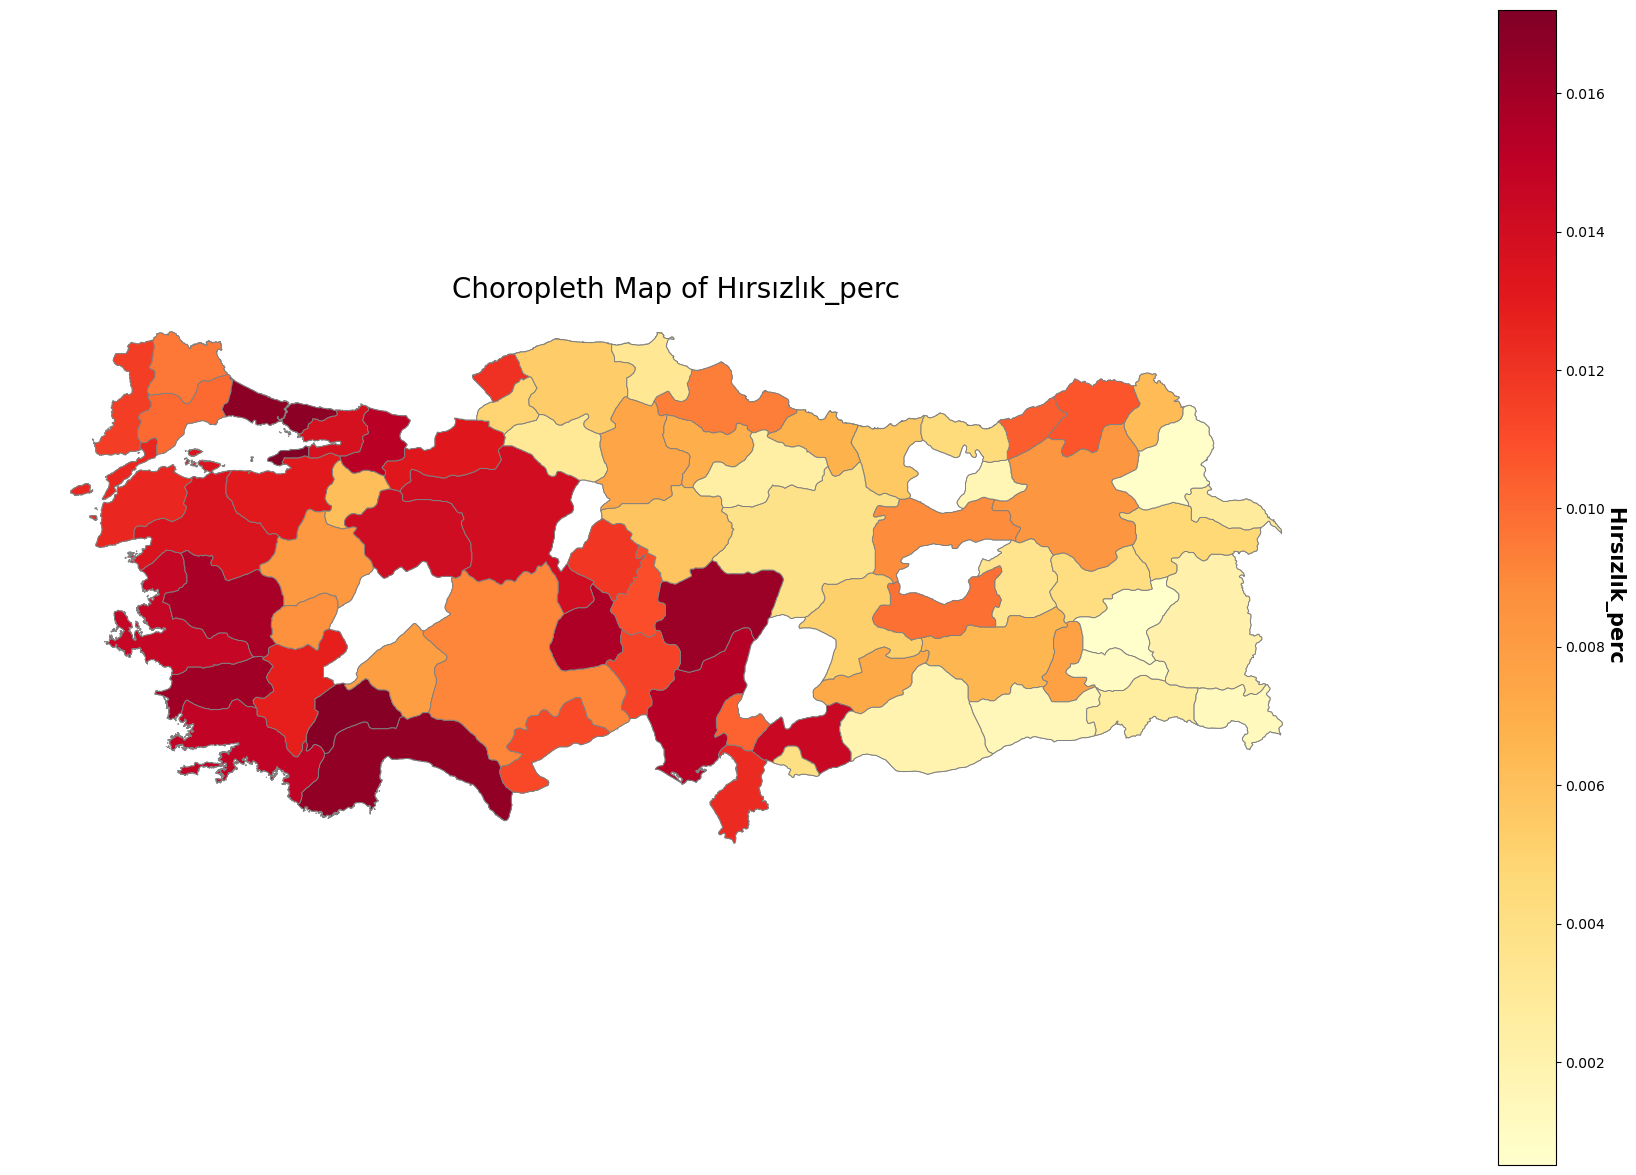

In [293]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))

# Choose a column from the merged GeoDataFrame to visualize on the map
column_to_visualize = 'Hırsızlık_perc'

# Plot the choropleth map
concatenated_df.plot(column=column_to_visualize, cmap='YlOrRd', linewidth=0.7, ax=ax, edgecolor='0.5', legend=False)
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=Normalize(vmin=concatenated_df[column_to_visualize].min(), vmax=concatenated_df[column_to_visualize].max()))

# Add color bar
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.04, pad=0.1)
cbar.set_label(f'{column_to_visualize} ', rotation=270, labelpad=15, size=15, weight='bold')

# Customize the plot
ax.set_title(f'Choropleth Map of {column_to_visualize}', fontdict={'fontsize': '20', 'fontweight': '6'})
ax.set_axis_off()
plt.show()

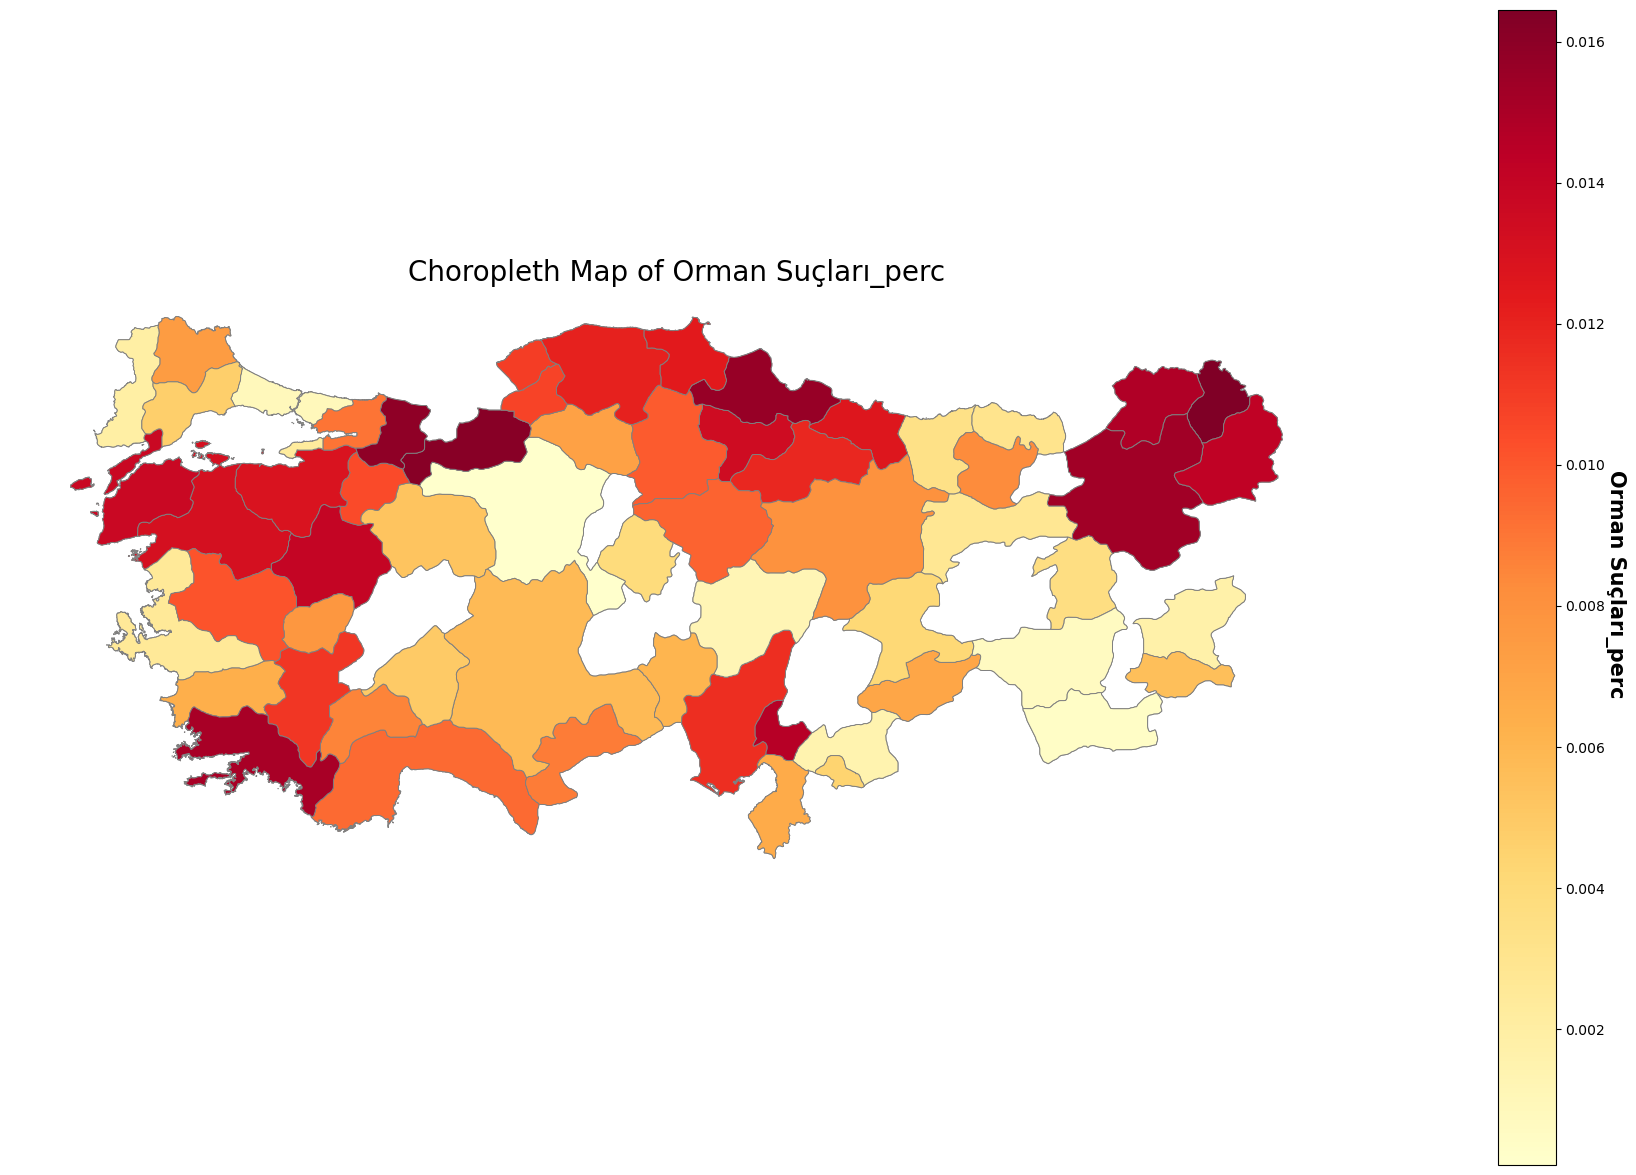

In [294]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))

column_to_visualize = 'Orman Suçları_perc'

concatenated_df.plot(column=column_to_visualize, cmap='YlOrRd', linewidth=0.7, ax=ax, edgecolor='0.5', legend=False)
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=Normalize(vmin=concatenated_df[column_to_visualize].min(), vmax=concatenated_df[column_to_visualize].max()))

cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.04, pad=0.1)
cbar.set_label(f'{column_to_visualize} ', rotation=270, labelpad=15, size=15, weight='bold')

ax.set_title(f'Choropleth Map of {column_to_visualize}', fontdict={'fontsize': '20', 'fontweight': '6'})
ax.set_axis_off()
plt.show()

# Question 3

In [295]:
import wbgapi as wb
import matplotlib.pyplot as plt


I imported the wanted data of the wanted countries. I looked at the WorldBank Data API site to figure out the ID's of the data I wanted. There are a lot of NaN values but when I dropped them I had so little complete data left so I chose not to use .dropna(). 

I obtained the data as one dataframe for all countries. I looke up the country codes from the worldbank data site.
In the question it wants the series as the columns but i realized it after i did all of the work.

In [296]:
data = wb.data.DataFrame(['SL.TLF.CACT.FE.NE.ZS','SH.DYN.MORT','SE.ADT.LITR.FE.ZS','IQ.CPA.GNDR.XQ','NY.GDP.PCAP.CD','SI.POV.LMIC'],
                      ['ALB','BIH','BGR','HRV','XKX','MNE','MKD','ROU','SRB','SVN','TUR','CYP','GRC','ITA','MLT','BLR','POL','UKR',])
data

YR1960  YR1961  YR1962  YR1963  YR1964  YR1965  \
economy series                                                                 
ALB     IQ.CPA.GNDR.XQ           NaN     NaN     NaN     NaN     NaN     NaN   
        NY.GDP.PCAP.CD           NaN     NaN     NaN     NaN     NaN     NaN   
        SE.ADT.LITR.FE.ZS        NaN     NaN     NaN     NaN     NaN     NaN   
        SH.DYN.MORT              NaN     NaN     NaN     NaN     NaN     NaN   
        SI.POV.LMIC              NaN     NaN     NaN     NaN     NaN     NaN   
...                              ...     ...     ...     ...     ...     ...   
XKX     NY.GDP.PCAP.CD           NaN     NaN     NaN     NaN     NaN     NaN   
        SE.ADT.LITR.FE.ZS        NaN     NaN     NaN     NaN     NaN     NaN   
        SH.DYN.MORT              NaN     NaN     NaN     NaN     NaN     NaN   
        SI.POV.LMIC              NaN     NaN     NaN     NaN     NaN     NaN   
        SL.TLF.CACT.FE.NE.ZS     NaN     NaN     NaN     NaN     NaN     NaN   

                              YR1966  YR1967  YR1968  YR1969  ...  \
economy series                                                ...   
ALB     IQ.CPA.GNDR.XQ           NaN     NaN     NaN     NaN  ...   
        NY.GDP.PCAP.CD           NaN     NaN     NaN     NaN  ...   
        SE.ADT.LITR.FE.ZS        NaN     NaN     NaN     NaN  ...   
        SH.DYN.MORT              NaN     NaN     NaN     NaN  ...   
        SI.POV.LMIC              NaN     NaN     NaN     NaN  ...   
...                              ...     ...     ...     ...  ...   
XKX     NY.GDP.PCAP.CD           NaN     NaN     NaN     NaN  ...   
        SE.ADT.LITR.FE.ZS        NaN     NaN     NaN     NaN  ...   
        SH.DYN.MORT              NaN     NaN     NaN     NaN  ...   
        SI.POV.LMIC              NaN     NaN     NaN     NaN  ...   
        SL.TLF.CACT.FE.NE.ZS     NaN     NaN     NaN     NaN  ...   

                                   YR2013       YR2014       YR2015  \
economy series                                                        
ALB     IQ.CPA.GNDR.XQ                NaN          NaN          NaN   
        NY.GDP.PCAP.CD        4413.063397  4578.633208  3952.803584   
        SE.ADT.LITR.FE.ZS             NaN          NaN          NaN   
        SH.DYN.MORT             10.500000     9.900000     9.600000   
        SI.POV.LMIC                   NaN     9.700000     3.700000   
...                                   ...          ...          ...   
XKX     NY.GDP.PCAP.CD        3704.562199  3902.529820  3520.780421   
        SE.ADT.LITR.FE.ZS             NaN          NaN          NaN   
        SH.DYN.MORT             16.300000    15.300000    14.400000   
        SI.POV.LMIC              4.700000     6.200000     3.800000   
        SL.TLF.CACT.FE.NE.ZS    18.870000    19.030000    16.010000   

                                  YR2016       YR2017       YR2018  \
economy series                                                       
ALB     IQ.CPA.GNDR.XQ               NaN          NaN          NaN   
        NY.GDP.PCAP.CD        4124.05539  4531.032207  5287.660817   
        SE.ADT.LITR.FE.ZS            NaN          NaN          NaN   
        SH.DYN.MORT              9.40000     9.300000     9.300000   
        SI.POV.LMIC              4.70000     3.600000     2.700000   
...                                  ...          ...          ...   
XKX     NY.GDP.PCAP.CD        3759.47104  4009.356038  4384.190404   
        SE.ADT.LITR.FE.ZS            NaN          NaN          NaN   
        SH.DYN.MORT             13.50000    12.600000    11.900000   
        SI.POV.LMIC              4.70000     4.200000          NaN   
        SL.TLF.CACT.FE.NE.ZS    16.28000    17.190000    16.670000   

                                   YR2019       YR2020       YR2021  \
economy series                                                        
ALB     IQ.CPA.GNDR.XQ                NaN          NaN          NaN   
        NY.GDP.PCAP.CD        5396.214227  

I defined a function that takes a data frame country and the indicator series. I randomly chose one country for 4 indicators. Some data is not available as it is seen in the graphs.

I used the years as time series data I did not feel the need to turn them into date-time altough i do not now if it was a necessity for the question. 



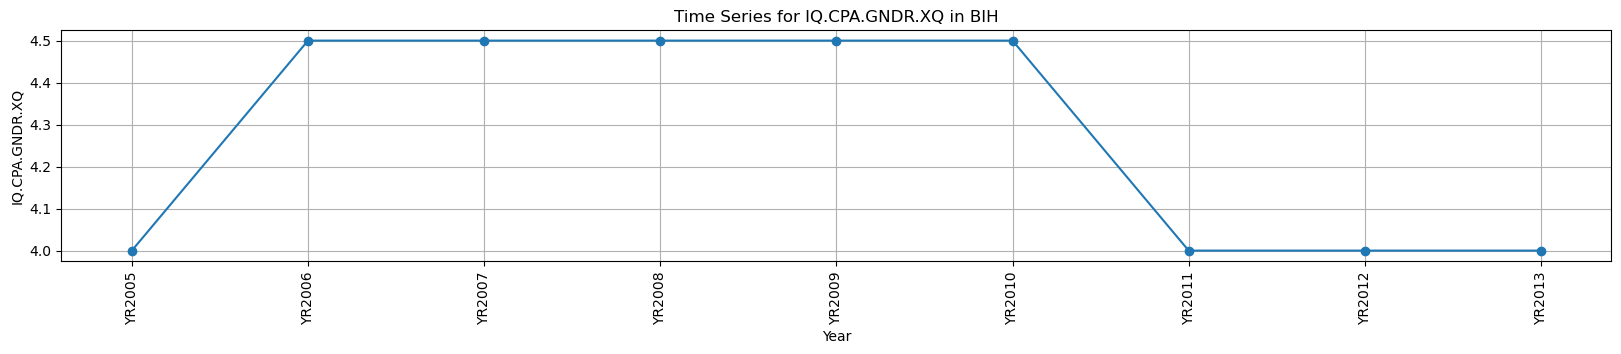

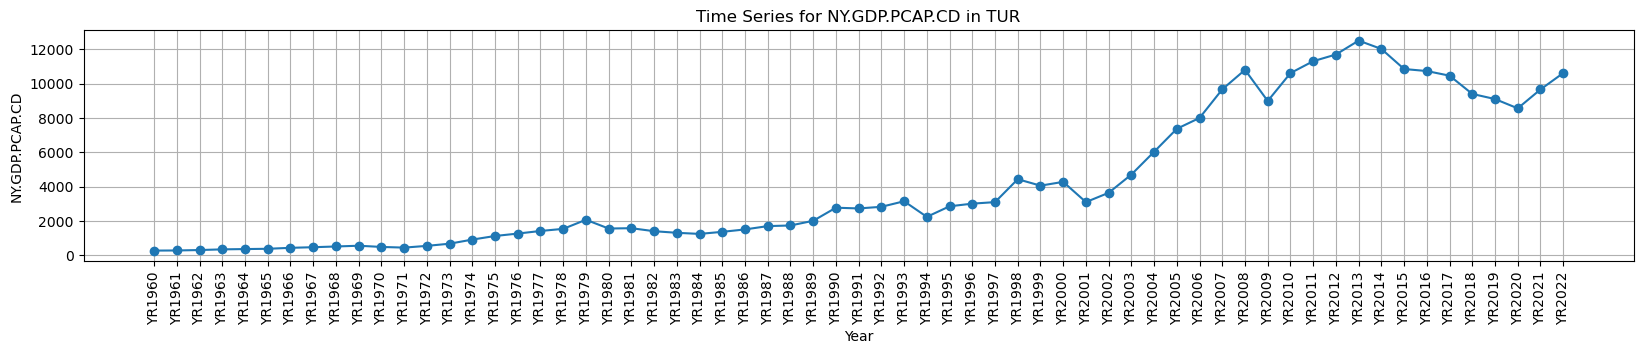

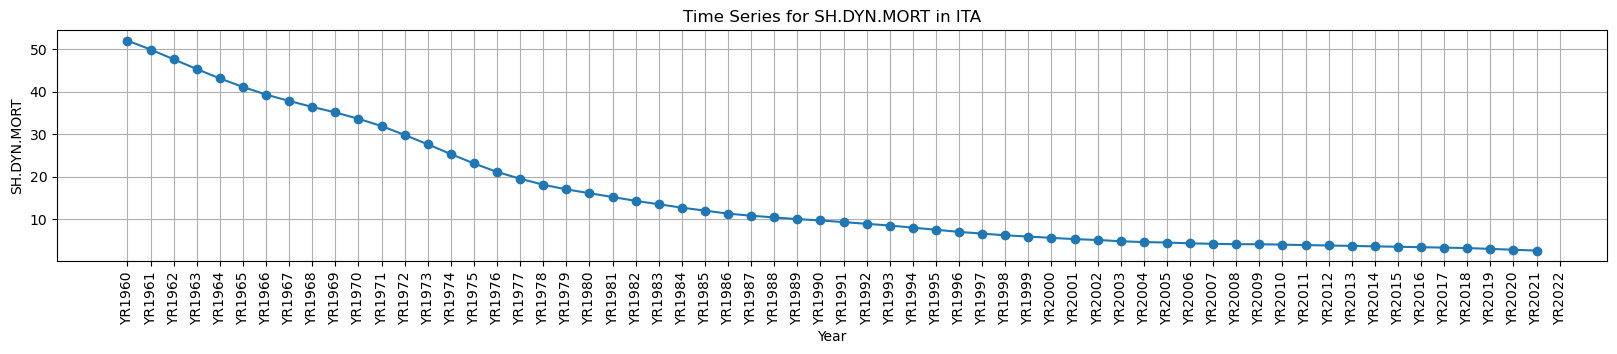

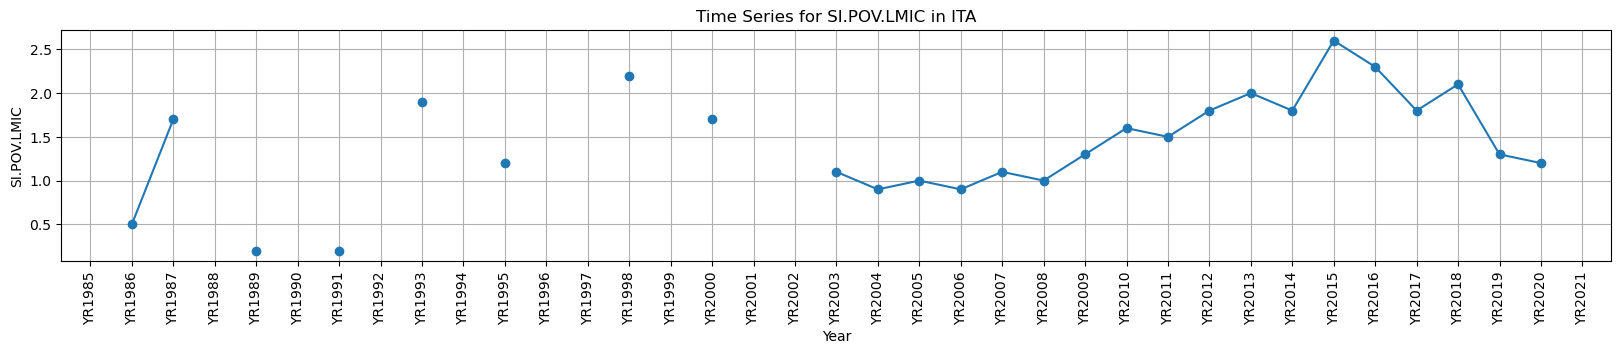

In [297]:
def plot_time_series(data_frame, country, series):
    if country not in data_frame.index.levels[0] or series not in data_frame.index.levels[1]:
        print(f"Country '{country}' or Series '{series}' not found in the DataFrame.")
        return


    time_series = data_frame.loc[(country, series)]


    plt.figure(figsize=(20, 3))
    plt.plot(time_series.index, time_series.values, marker='o')
    plt.title(f'Time Series for {series} in {country}')
    plt.xlabel('Year')
    plt.ylabel(series)
    

    plt.xticks(rotation='vertical')
    
    plt.grid(True)
    plt.show()

plot_time_series(data, 'BIH', 'IQ.CPA.GNDR.XQ')
plot_time_series(data, 'TUR', 'NY.GDP.PCAP.CD')
plot_time_series(data, 'ITA', 'SH.DYN.MORT')
plot_time_series(data, 'ITA', 'SI.POV.LMIC')

This function scatter plots by taking the dataframe the year we want to plot and the two indicators we want to plot. 
I chose 4 random years to plot and the GDP Per capita and Child mortality under 5 year olds because I thought there might be some correlation between the two.


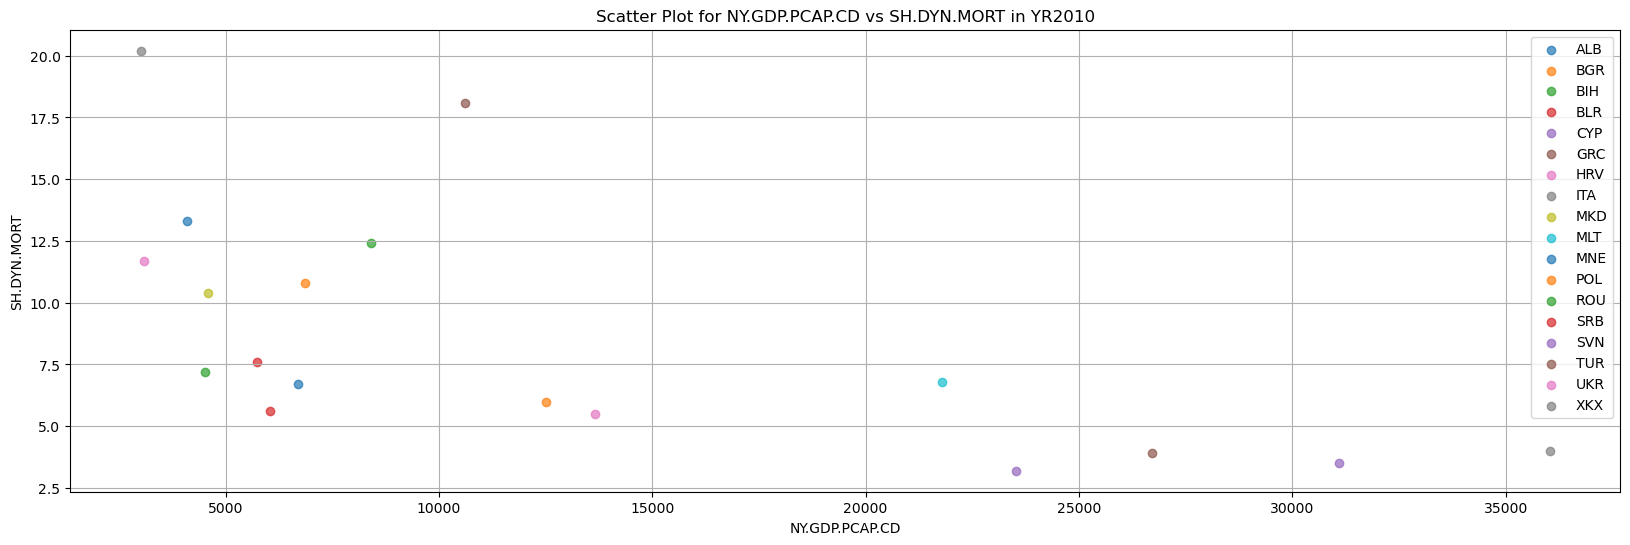

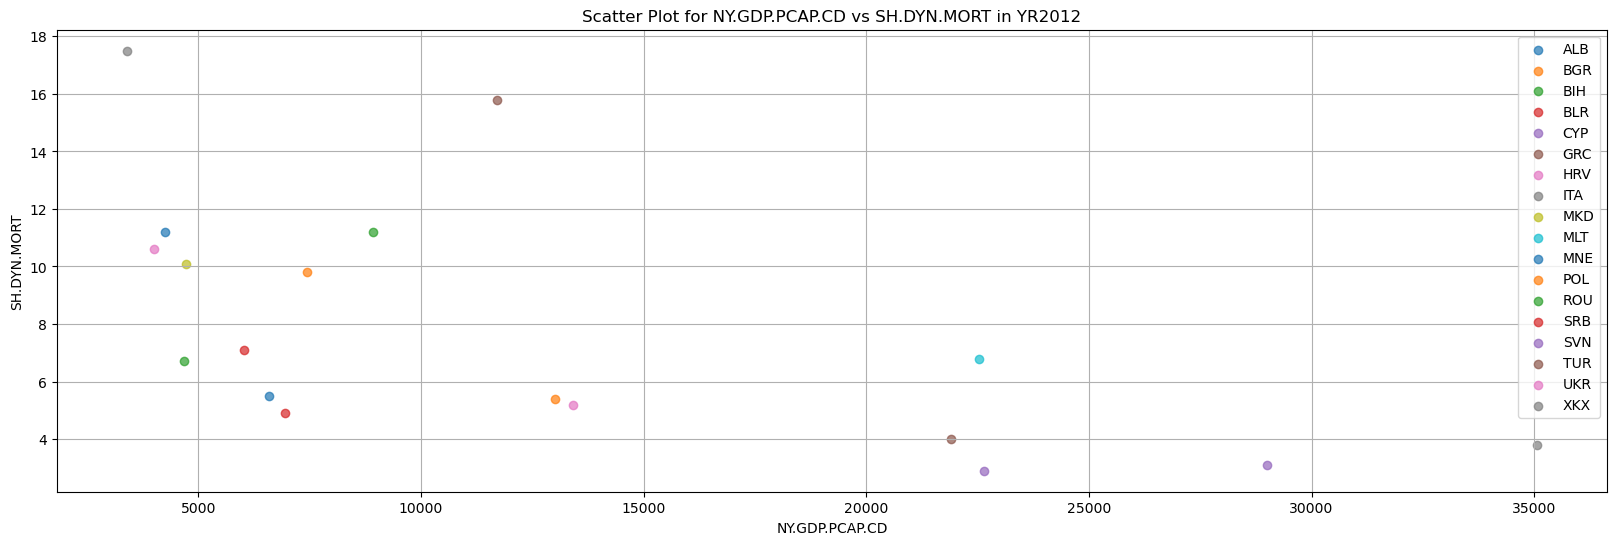

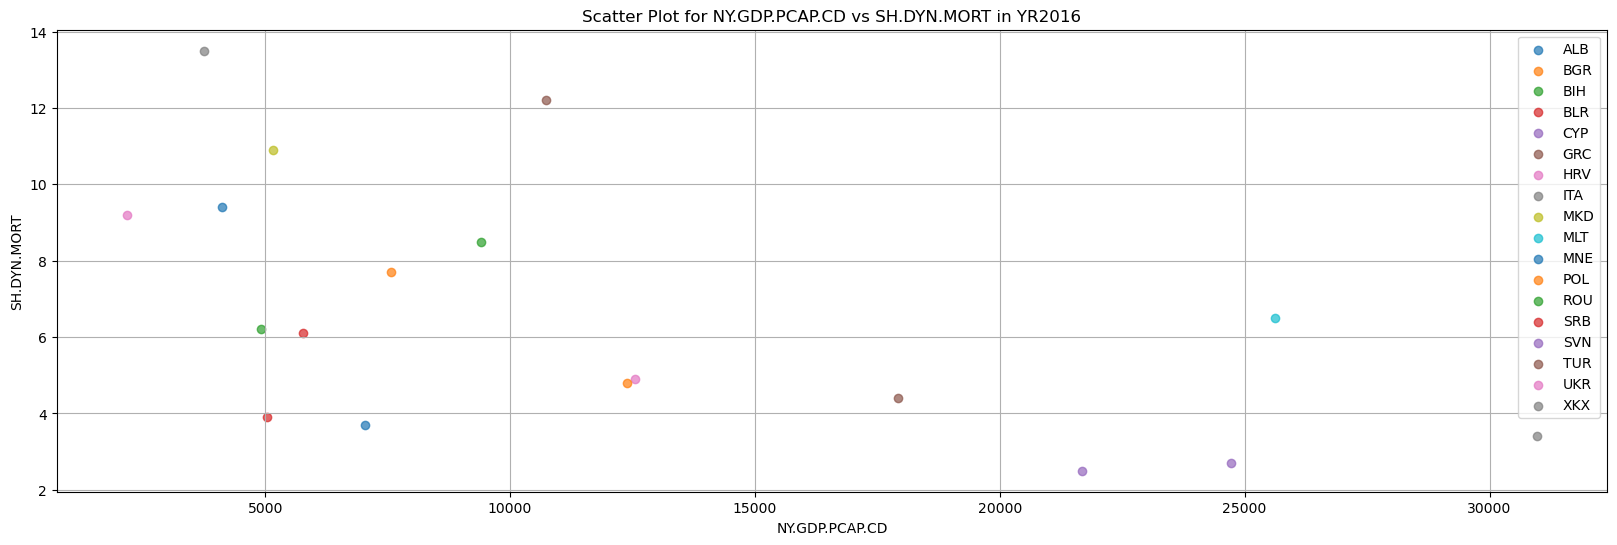

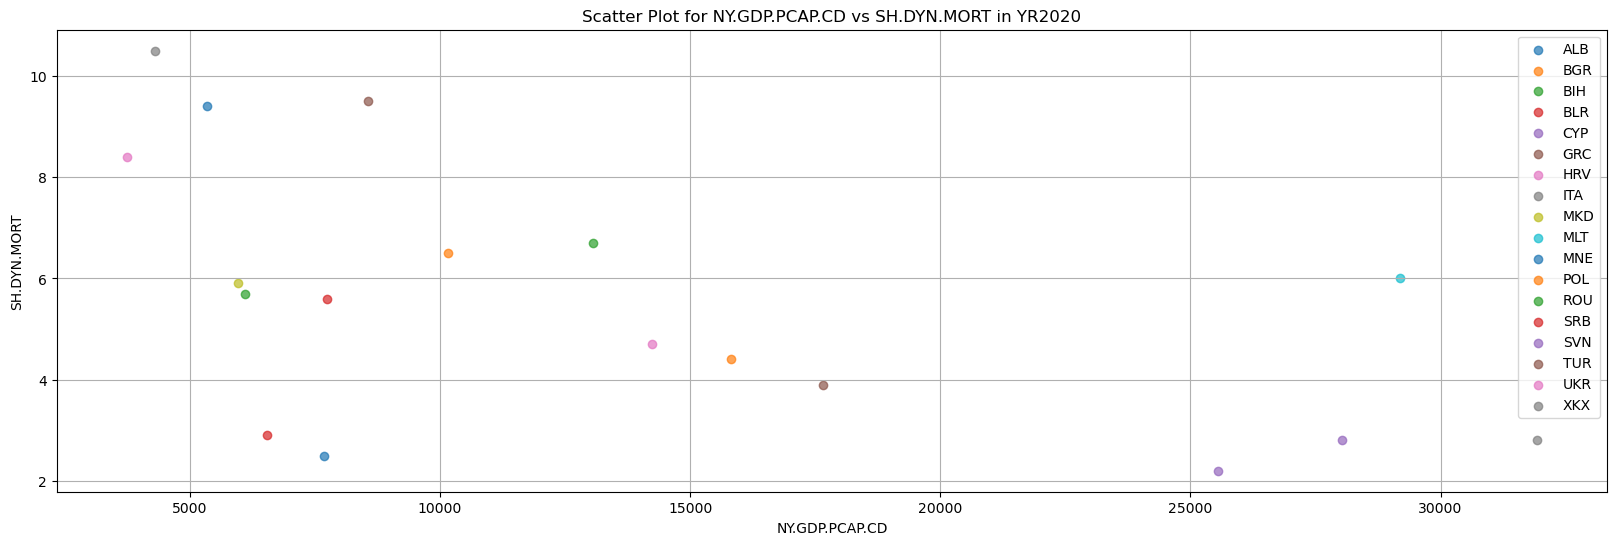

In [298]:
def scatter_plot_for_years(data_frame, years, series1, series2):
    if series1 not in data_frame.index.levels[1] or series2 not in data_frame.index.levels[1]:
        print(f"Series '{series1}' or '{series2}' not found in the DataFrame.")
        return

    for year in years:

        year_data = data_frame.loc[:, year]

        plt.figure(figsize=(20, 6))
        for country in data_frame.index.levels[0]:
            country_data = year_data.loc[(country, slice(None))]
            plt.scatter(country_data.loc[series1], country_data.loc[series2], label=country, alpha=0.7)

        plt.title(f'Scatter Plot for {series1} vs {series2} in {year}')
        plt.xlabel(series1)
        plt.ylabel(series2)
        plt.legend()
        plt.grid(True)
        plt.show()

years_to_plot = ['YR2010', 'YR2012', 'YR2016', 'YR2020']
scatter_plot_for_years(data, years_to_plot, 'NY.GDP.PCAP.CD', 'SH.DYN.MORT')



I have created a function to plot all years available.
I called the function for Child Mortality against Female Literacy and we can conclude that where and when female literacy level is high child mortality is low. But I think there are not many datapoints in this plot if we compare it to the one after this with female workforce participation and child mortality. 
I don't think this plot only is enough to draw conclusions while the one after gives a much better idea. 

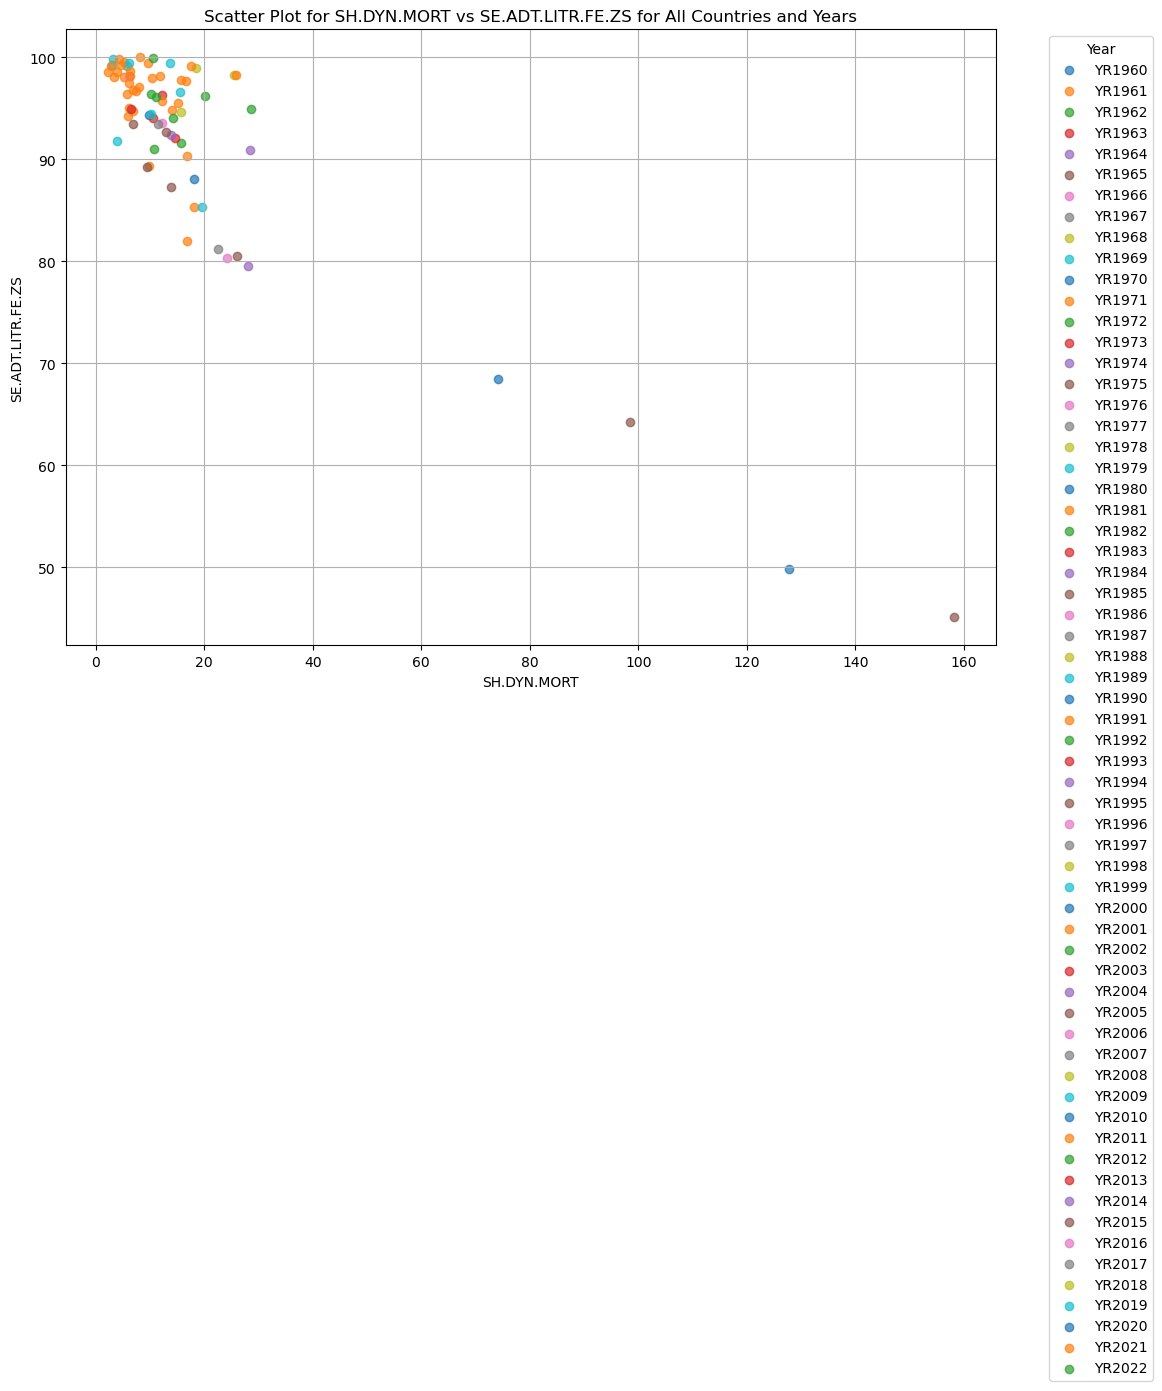

In [299]:
def scatter_plot_all_years(data_frame, series1, series2):
    series1 = series1.strip()  
    series2 = series2.strip()  
    if series1 not in data_frame.index.get_level_values(1) or series2 not in data_frame.index.get_level_values(1):
        print(f"Series '{series1}' or '{series2}' not found in the DataFrame.")
        return


    years = data_frame.columns


    plt.figure(figsize=(12, 8))
    for year in years:
        year_data = data_frame[year]
        plt.scatter(year_data.loc[:, series1], year_data.loc[:, series2], label=year, alpha=0.7)

    plt.title(f'Scatter Plot for {series1} vs {series2} for All Countries and Years')
    plt.xlabel(series1)
    plt.ylabel(series2)
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

scatter_plot_all_years(data, 'SH.DYN.MORT', 'SE.ADT.LITR.FE.ZS')

when we plot the Female Workforce Participation against Child Mortality the conclusion we can come to is that in the years and countries where the female workforce participation is lower is also where child mortality is very low. There are some outliers where the the workforce participation is high but also the child mortality is high. These may be from war years and countries or 3rd world countries where women are forced to work but child life expectency is low.


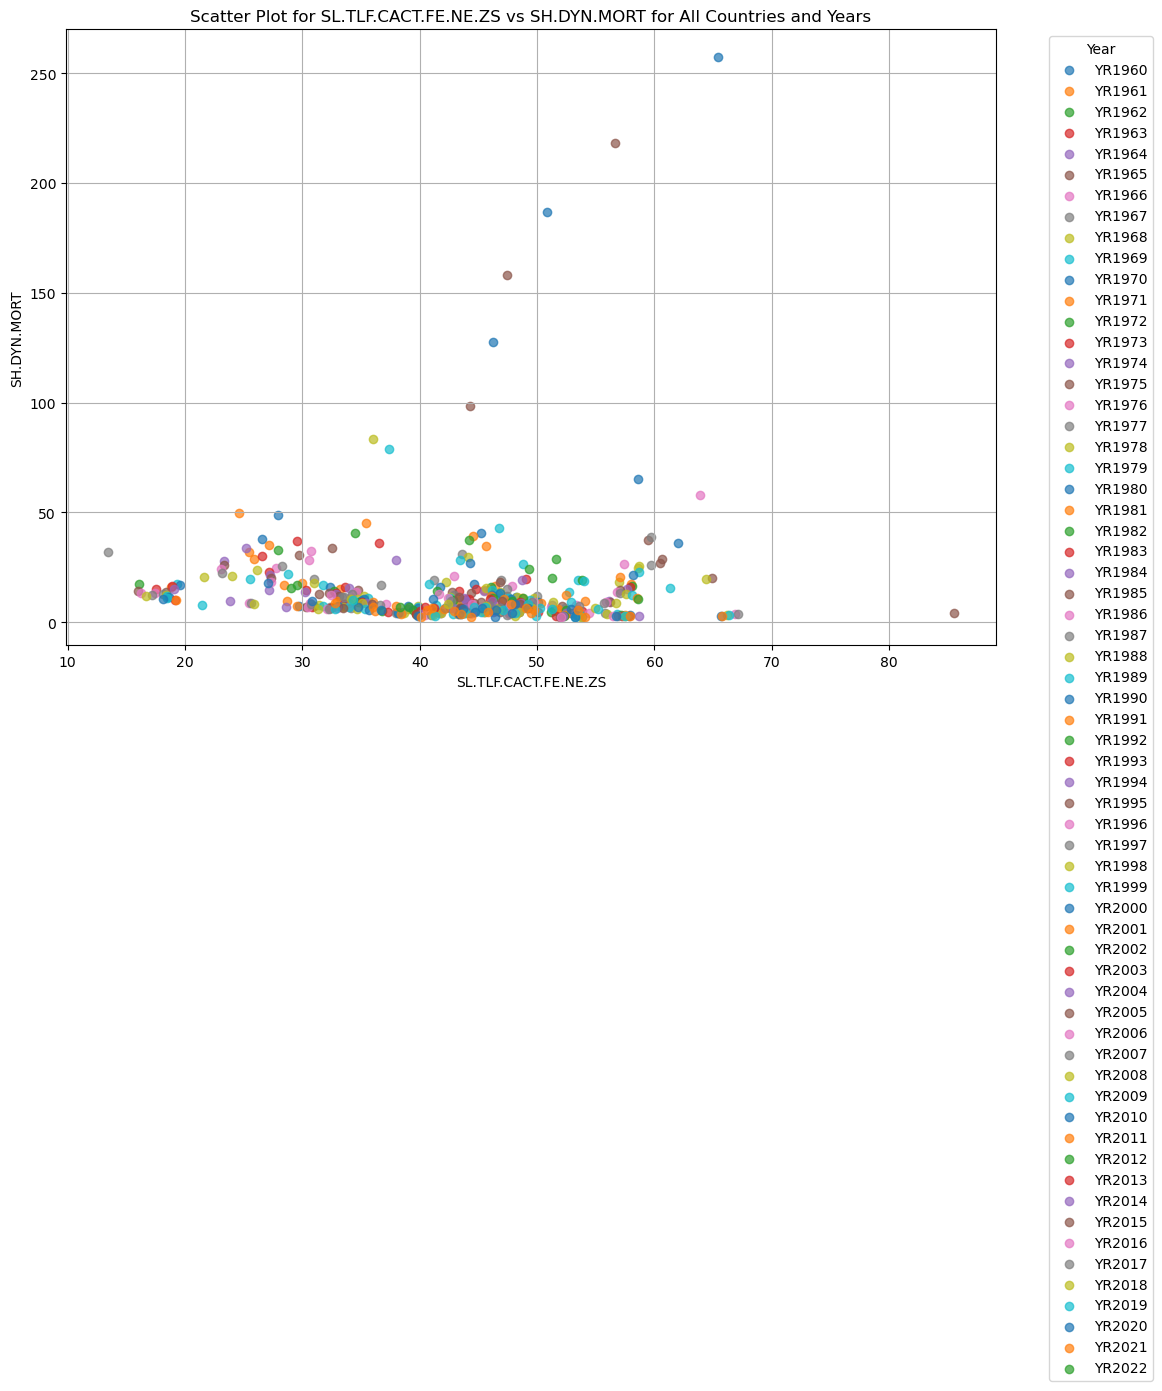

In [300]:
scatter_plot_all_years(data, 'SL.TLF.CACT.FE.NE.ZS','SH.DYN.MORT' )

I had to import seaborn library for the violin plot. 

But i could not figure out how to plot 'Female Literacy' against 'Gender Equality' so i plotted each of them against the years. the gender equality data seems quite incomplete. However the female literacy has become very common and throughout the years

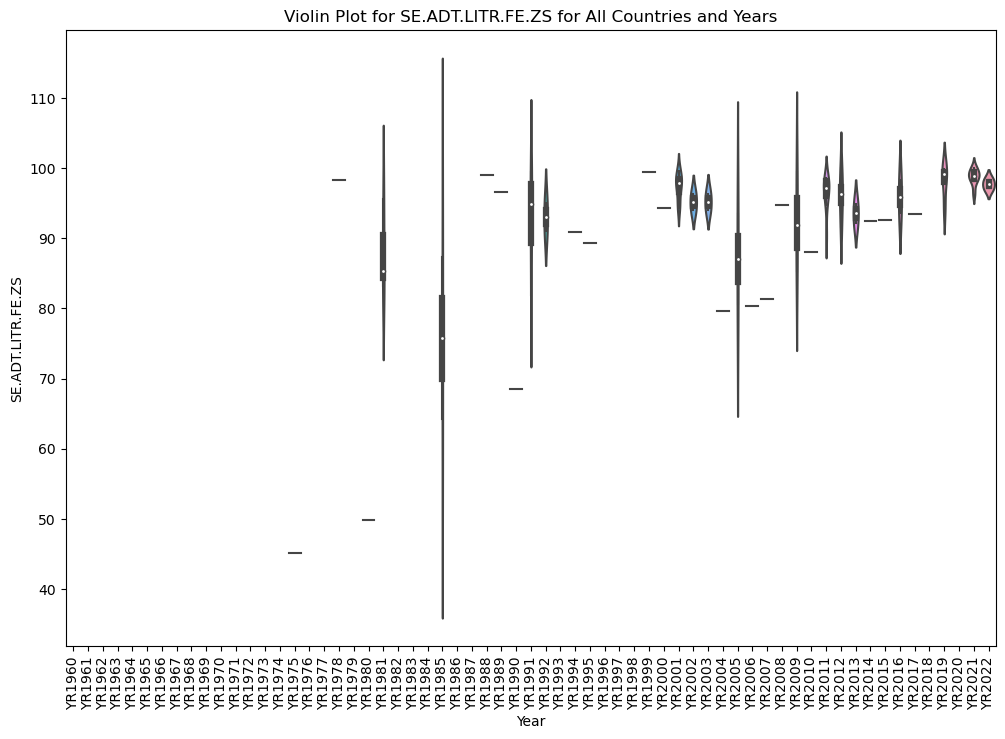

In [301]:
import seaborn as sns
import matplotlib.pyplot as plt

def violin_plot_single_series(data_frame, series):
    series = series.strip()
    if series not in data_frame.index.get_level_values(1):
        print(f"Series '{series}' not found in the DataFrame.")
        return

    years = data_frame.columns

    data = []
    for year in years:
        year_data = data_frame[year]
        data.extend(list(zip(year_data.loc[:, series], [year] * len(year_data))))

    df = pd.DataFrame(data, columns=[series, 'Year'])

    plt.figure(figsize=(12, 8))
    sns.violinplot(x='Year', y=series, data=df)
    plt.title(f'Violin Plot for {series} for All Countries and Years')
    plt.xlabel('Year')
    plt.xticks(rotation='vertical')
    plt.ylabel(series)
    plt.show()

violin_plot_single_series(data, 'SE.ADT.LITR.FE.ZS')


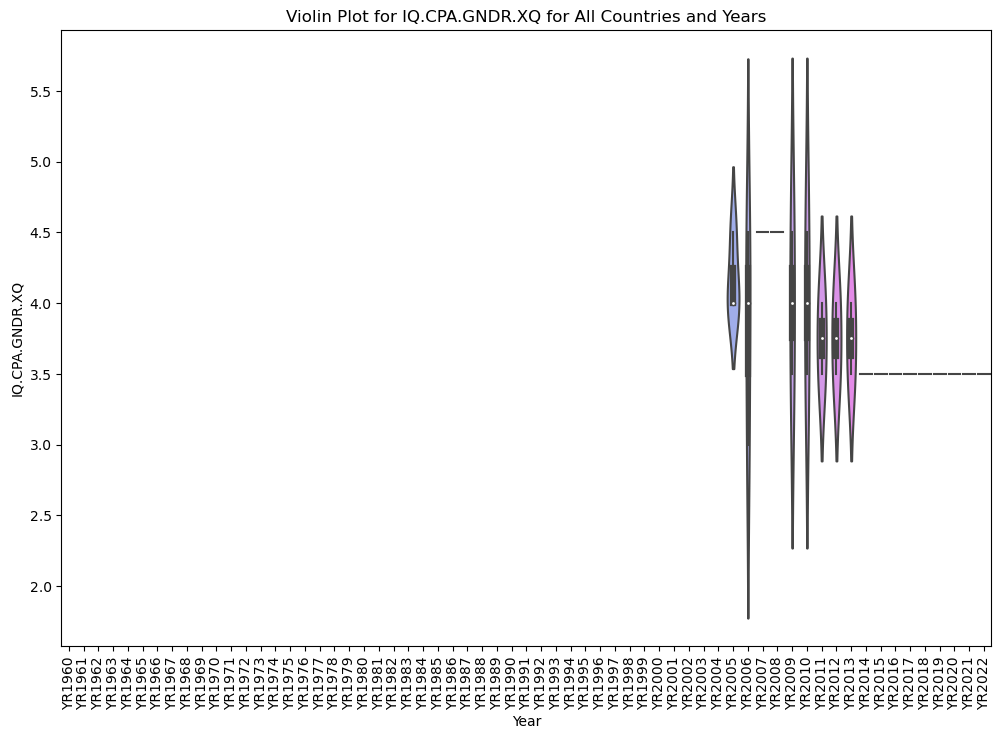

In [302]:
violin_plot_single_series(data, 'IQ.CPA.GNDR.XQ')